In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

import glob

In [2]:
dbfile = 'baseline_nexp2_v1.7_10yrs.db'
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
conn = db.OpsimDatabase(dbfile)


In [6]:
bundleList = []
for filtername in 'ugrizy':
    sql = 'night < 730 and filter="%s"' % filtername
    
    metric = metrics.MinMetric(col='night', metricName='MinNight_%s' % filtername)
    slicer = slicers.HealpixSlicer()
    summaryStats = [metrics.SumMetric()]
    plotDict = {'colorMax': 365}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))
    

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint night < 730 and filter="z" for columns ['fieldDec', 'night', 'fieldRA']
Found 75226 visits
Running:  ['opsim_MinNight_z_night_lt_730_and_z_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night < 730 and filter="g" for columns ['fieldDec', 'night', 'fieldRA']
Found 37579 visits
Running:  ['opsim_MinNight_g_night_lt_730_and_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night < 730 and filter="u" for columns ['fieldDec', 'night', 'fieldRA']
Found 25481 visits
Running:  ['opsim_MinNight_u_night_lt_730_and_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night < 730 and filter="r" for columns ['fieldDec', 'night', 'fieldRA']
Found 83137 vi

/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 89.2485  dipole: lon: -142.504, lat: 19.6505, amp: 92.324
  mono, lon, lat, amp


Plotting complete.
Plotting figures with "night < 730 and filter="g"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 135.632  dipole: lon: -121.003, lat: 16.8922, amp: 118.716
  mono, lon, lat, amp


Plotting complete.
Plotting figures with "night < 730 and filter="u"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 146.126  dipole: lon: -117.613, lat: 11.4441, amp: 122.274
  mono, lon, lat, amp


Plotting complete.
Plotting figures with "night < 730 and filter="r"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 101.616  dipole: lon: -133.328, lat: 19.9803, amp: 99.7458
  mono, lon, lat, amp


Plotting complete.
Plotting figures with "night < 730 and filter="y"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 72.4809  dipole: lon: -138.158, lat: 18.7004, amp: 85.2644
  mono, lon, lat, amp


Plotting complete.
Plotting figures with "night < 730 and filter="i"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 97.9239  dipole: lon: -133.74, lat: 18.108, amp: 99.7286
  mono, lon, lat, amp


Plotting complete.


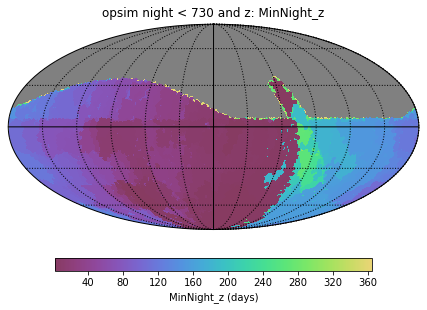

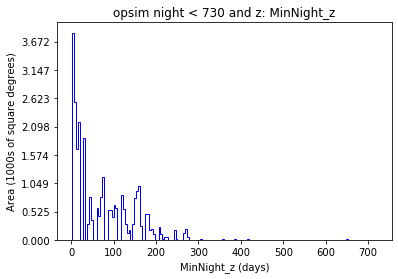

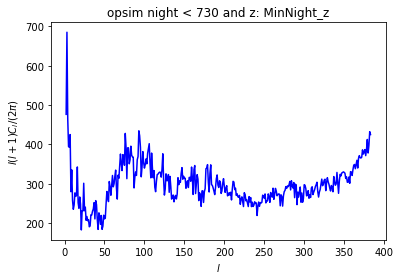

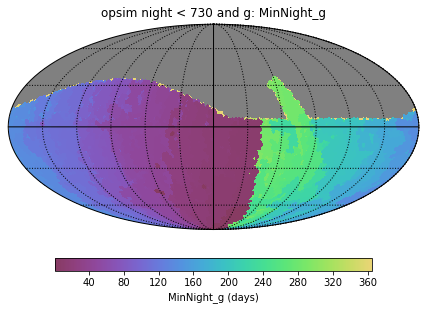

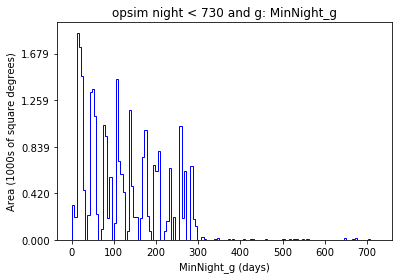

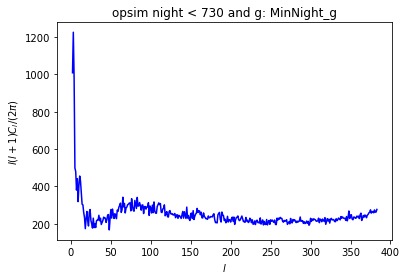

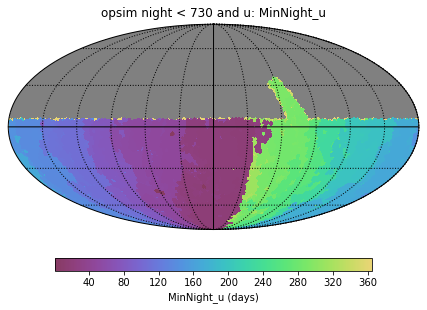

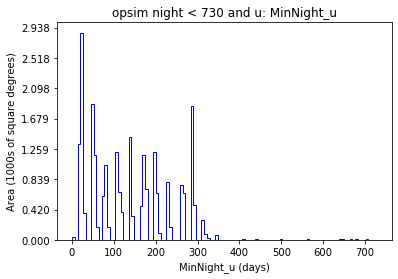

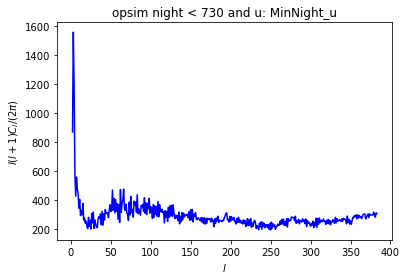

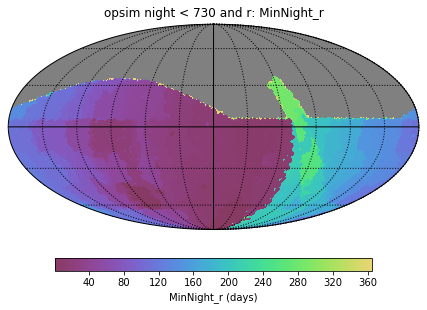

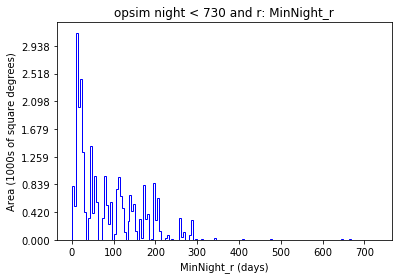

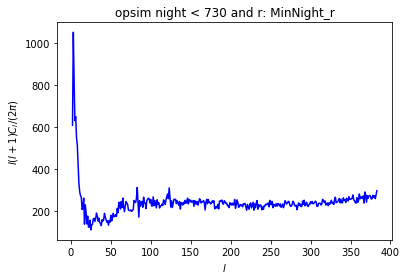

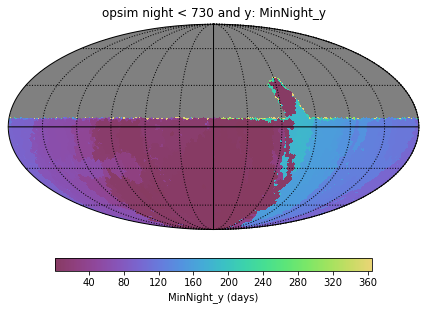

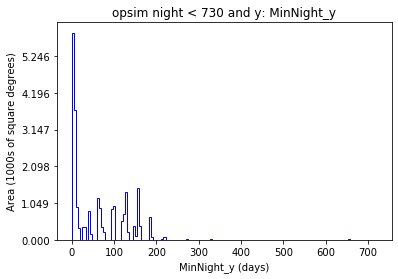

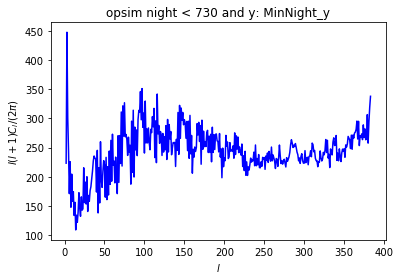

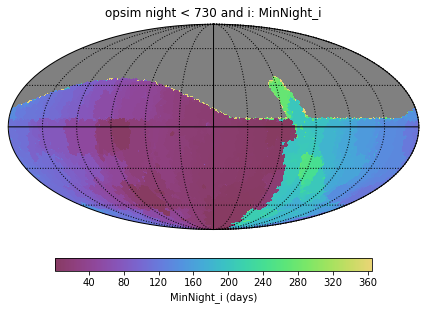

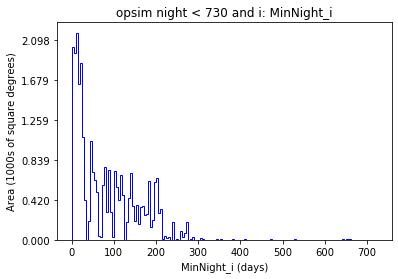

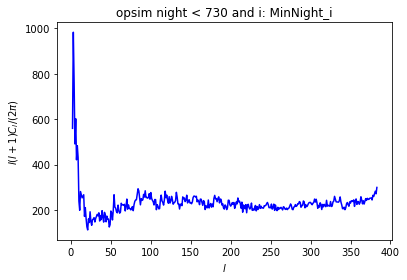

In [7]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)